### Importing and Merging Data

In [524]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

In [348]:
# Importing dataset
NGO = pd.read_csv("Country-data.csv")

In [349]:
NGO.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [350]:
NGO.shape

(167, 10)

In [351]:
NGO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [352]:
NGO.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [353]:
NGO.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [354]:
NGO.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64

In [355]:
NGO.isna().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [356]:
NGO.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [357]:
NGO.country.nunique()

167

In [358]:
# Checking the percentage of missing values
round(100*(NGO.isnull().sum()/len(NGO.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

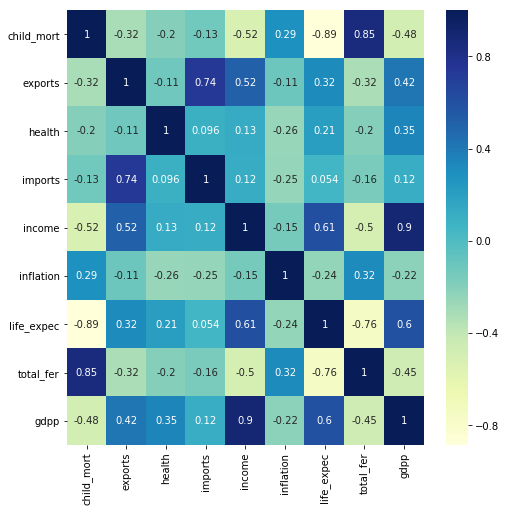

In [426]:
# visualizing the data
plt.figure(figsize=(8,8))
sns.heatmap(NGO.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [360]:
# checking the outliers at different percentiles
NGO.select_dtypes(exclude='object').describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


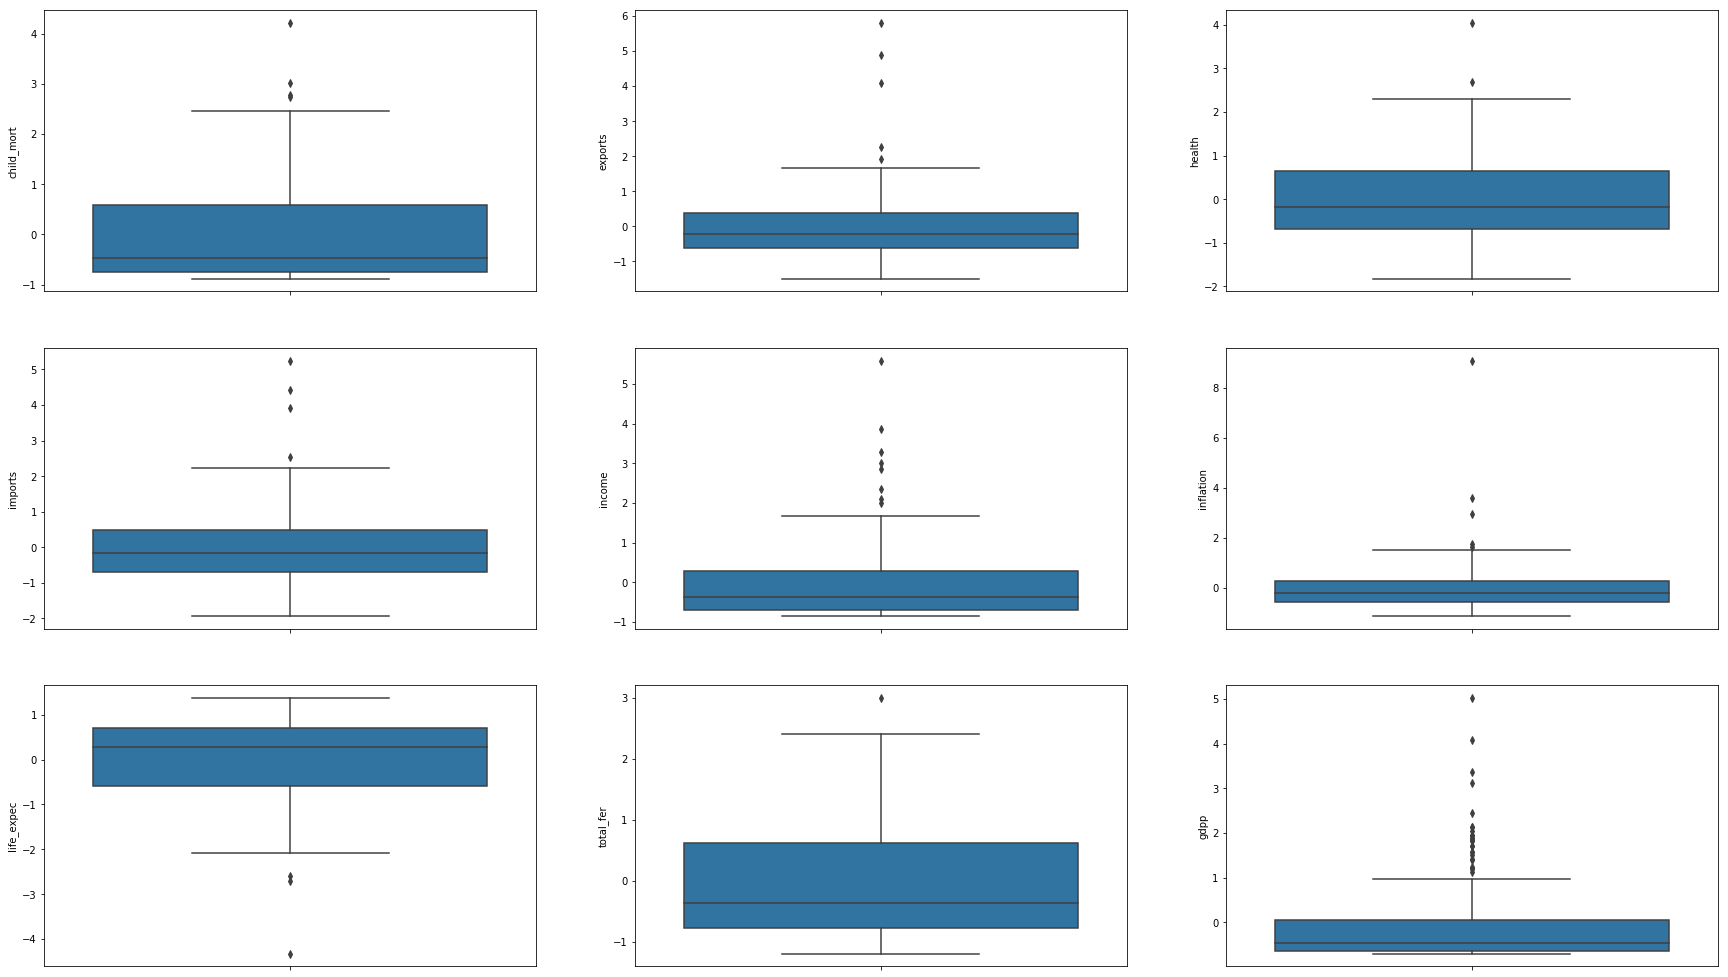

In [425]:
# visualizing the outliers

plt.figure(figsize=(30, 30))
plt.subplot(5,3,1)
sns.boxplot(y = 'child_mort', data = NGO)
plt.subplot(5,3,2)
sns.boxplot(y = 'exports', data = NGO)
plt.subplot(5,3,3)
sns.boxplot(y = 'health', data = NGO)
plt.subplot(5,3,4)
sns.boxplot(y = 'imports', data = NGO)
plt.subplot(5,3,5)
sns.boxplot(y = 'income', data = NGO)
plt.subplot(5,3,6)
sns.boxplot(y = 'inflation', data = NGO)
plt.subplot(5,3,7)
sns.boxplot(y = 'life_expec', data = NGO)
plt.subplot(5,3,8)
sns.boxplot(y = 'total_fer', data = NGO)
plt.subplot(5,3,9)
sns.boxplot(y = 'gdpp', data = NGO)
plt.show()

## Feature Standardisation

In [361]:
# Normalising continuous features
df = NGO.select_dtypes(exclude='object')

In [362]:
# using normal calc. i.e. (value-mean)/SD
normalized_df=(df-df.mean())/df.std()
NGO = NGO.drop(df.columns, 1)
NGO = pd.concat([NGO,normalized_df],axis=1)
NGO.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [432]:
## using standard scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
NGO_norm = standard_scaler.fit_transform(df)

## Let's change the standardized data to a dataframe
NGO_norm=pd.DataFrame(NGO_norm)
NGO_norm.columns=df.columns
NGO_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [433]:
NGO_norm.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [169]:
NGO = NGO.drop(df.columns, 1)
NGO = pd.concat([NGO,NGO_norm],axis=1)
NGO.head()

,country,0,1,2,3,4,5,6,7,8
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PCA on the data

In [434]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [435]:
#Doing the PCA on the normalised numeric data excluding country
pca.fit(NGO_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [436]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [437]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [438]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [439]:
# Will take and check the first 2 PC's

cols=list(NGO_norm.columns)
pcs_df=pd.DataFrame({'pc1':pca.components_[0],'pc2':pca.components_[1],'Feature':cols})
pcs_df

,pc1,pc2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


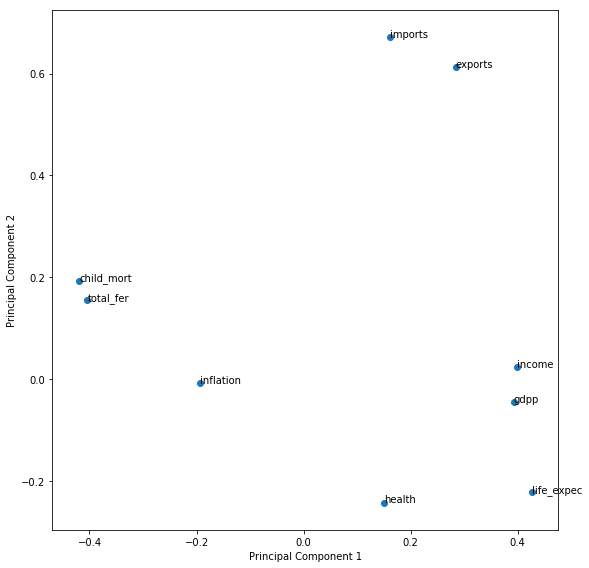

In [444]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.pc1, pcs_df.pc2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.pc1[i],pcs_df.pc2[i]))
plt.tight_layout()
plt.show()

In [445]:
# checking how much variance is explained by number of components-1,2,3,4,5,6,7,8,9
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([45.95, 63.13, 76.13, 87.18, 94.52, 97.  , 98.26, 99.24, 99.98])

In [371]:
product = np.dot(pca.components_[1],pca.components_[2])
product.round(5)

0.0

In [446]:
## getting all the PC's obtained by PCA

In [447]:
colnames = list(normalized_df.columns)
pcs_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'Feature':colnames})

In [448]:
pcs_df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489,-0.682743,0.327542,child_mort
1,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303,-0.014197,-0.123082,exports
2,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831,0.072497,0.113088,health
3,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190,-0.028946,0.099037,imports
4,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562,0.352624,0.612982,income
5,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633,-0.011538,-0.025236,inflation
6,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486,-0.504664,0.294040,life_expec
7,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826,0.293353,-0.026336,total_fer
8,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998,-0.249696,-0.625646,gdpp


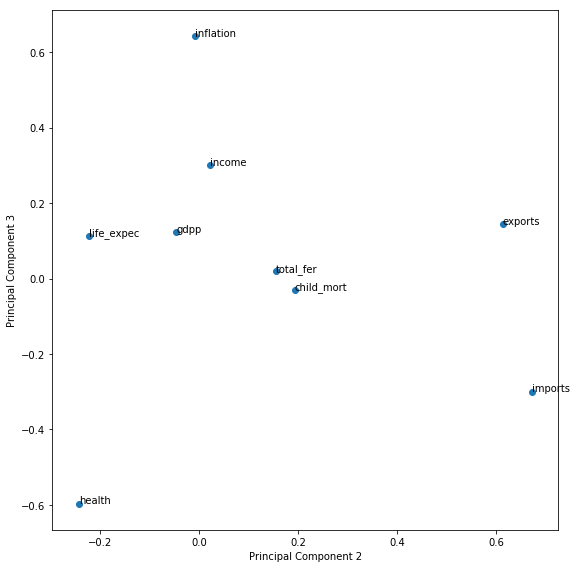

In [451]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df1.PC2, pcs_df1.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df1.Feature):
    plt.annotate(txt, (pcs_df1.PC2[i],pcs_df1.PC3[i]))
plt.tight_layout()
plt.show()

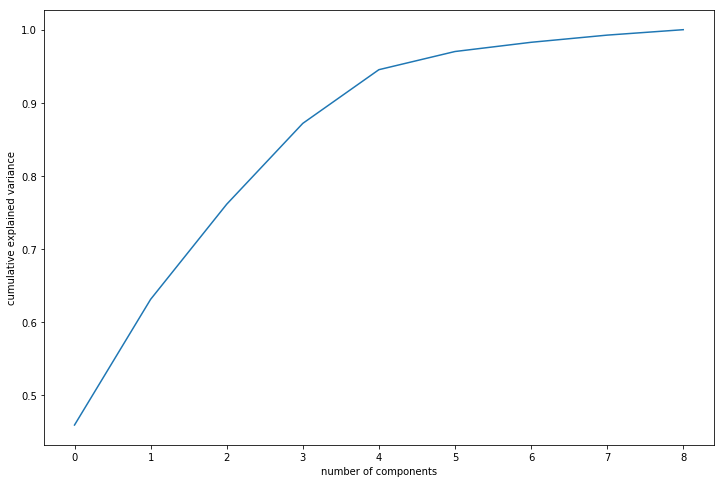

In [452]:
#Making the screeplot - plotting the cumulative variance against the number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [377]:
## From above scree plot we can assume to get 85-87% variance we can use 4 PC's, i am trying with 87% variance as it is 
## mentioned in many sources including discussion forum that better to go for variance between 85-90%

In [474]:
pca_again = PCA(0.87)

In [475]:
df_train_pca2 = pca_again.fit_transform(NGO_norm)
df_train_pca2.shape

(167, 4)

In [380]:
## so from above we can see that 4 PC's we got for 87% variance are transformed back on to our data.

In [381]:
## Checking how incremental PCA works here.

In [476]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

#### Basis transformation - getting the data onto our PCs

In [477]:
#Applying/fitting selected components to our data - 4 components
ic_pca = pca_final.fit_transform(normalized_df)
ic_pca.shape

(167, 4)

In [479]:
ic_pca

array([[-2.90504953e+00,  8.80889580e-02,  7.18841261e-01,
         9.93710369e-01],
       [ 4.28070135e-01, -5.86096292e-01,  3.20089646e-01,
        -1.16768097e+00],
       [-2.82139745e-01, -4.45317863e-01, -1.22146183e+00,
        -8.47577887e-01],
       [-2.92218008e+00,  1.69434077e+00, -1.51717157e+00,
         8.73339848e-01],
       [ 1.02889318e+00,  1.30096737e-01,  1.92343951e-01,
        -8.42274895e-01],
       [ 2.83846572e-02, -1.75145297e+00, -7.91140619e-01,
        -5.23290042e-02],
       [-1.02540528e-01, -5.65774300e-01, -2.76836260e-01,
        -1.45394825e+00],
       [ 2.33244068e+00, -1.99212821e+00, -2.36341207e-01,
         1.12909454e+00],
       [ 2.96494167e+00, -7.32646016e-01,  5.46776474e-01,
         1.18898493e+00],
       [-1.79466250e-01, -3.92571564e-01, -8.61663738e-01,
        -4.25377273e-01],
       [ 1.26227794e+00, -6.63093362e-01,  4.52173180e-01,
         5.93004990e-02],
       [ 1.66572736e+00,  5.58713689e-01, -1.01710933e+00,
      

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [480]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(ic_pca.transpose())

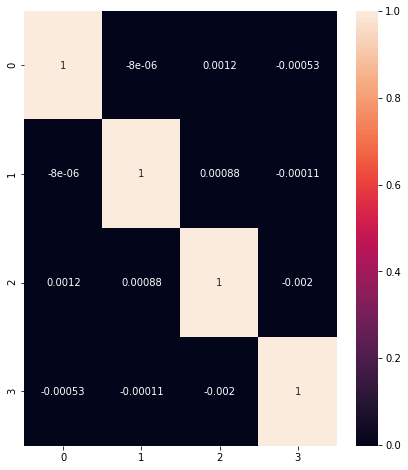

In [481]:
plt.figure(figsize = (7,8))
sns.heatmap(corrmat,annot = True)

In [ ]:
## we can see from above heatmap that correlation between PC's is very low

In [484]:
# checking how our selected 4 PC's explaining the variance

pca_final.explained_variance_ratio_

array([0.45933573, 0.17166158, 0.12883235, 0.11037499])

In [485]:
## Above output shows that 4 components are explaining 87% variance

In [486]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092542815 , min corr:  -0.0020378295355501647


#### Indeed - there is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [488]:
# converting the PCA matrix to a datafraame i.e.matrix obtained after fitting incremental PCA on to our data
ic_pca_df=pd.DataFrame(ic_pca,columns=['pc1','pc2','pc3','pc4'])
ic_pca_df

,pc1,pc2,pc3,pc4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275
5,0.028385,-1.751453,-0.791141,-0.052329
6,-0.102541,-0.565774,-0.276836,-1.453948
7,2.332441,-1.992128,-0.236341,1.129095
8,2.964942,-0.732646,0.546776,1.188985
9,-0.179466,-0.392572,-0.861664,-0.425377


In [ ]:
## Adding back the non-PCA columns to the above obtained PCA dataframe 

In [498]:
df = NGO.select_dtypes(include='object')

In [499]:
#NGO_non_pca=NGO.drop(df.columns,1)
ic_pca_all=pd.concat([df,ic_pca_df,NGO_norm],axis=1)
ic_pca_all.shape

(167, 14)

In [500]:
ic_pca_all.head()

,country,pc1,pc2,pc3,pc4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,0.428070,-0.586096,0.320090,-1.167681,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [501]:
## so now PCA is done and added back the original data to PCA dataset also, so now we can check for outliers and see we can
## discard any outliers are not.

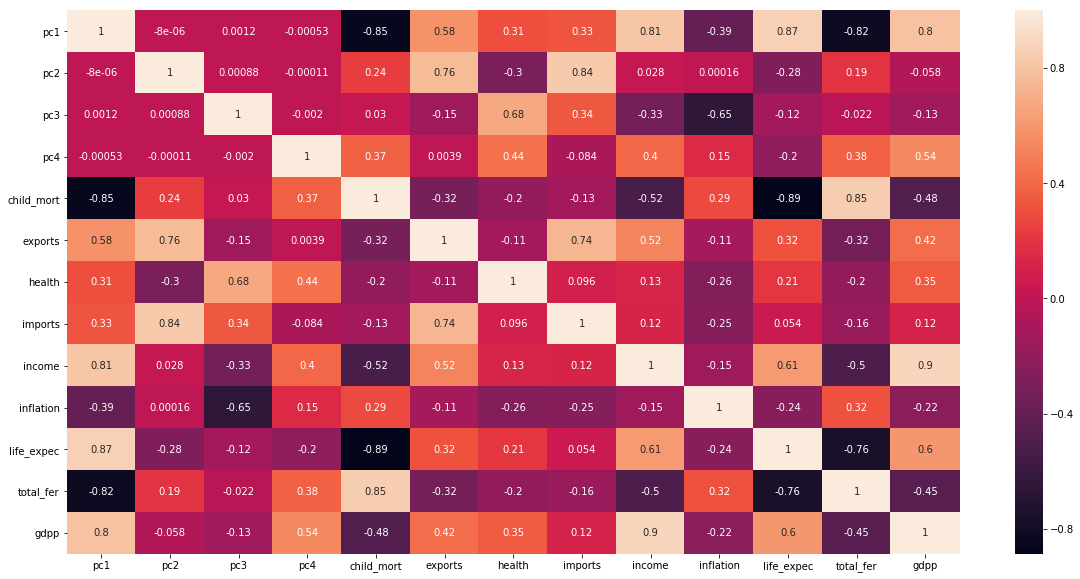

In [502]:
# checking the correlation matrix

plt.figure(figsize=(20,10))
sns.heatmap(ic_pca_all.corr(),annot=True)

#### From above we can see that PC1 is positively correlated with life_expectancy, income and next gdpp also there. PC1 is negatively correlated with total_fer and child_mortality so PC1 is well explaining those features.

#### PC2 is highly positively  correlated with  exports and imports

#### PC3 is highly positively  correlated with health and  negatively correlated with inflation, so PC3 well explaining those

### Doing outlier analysis for all the PC's

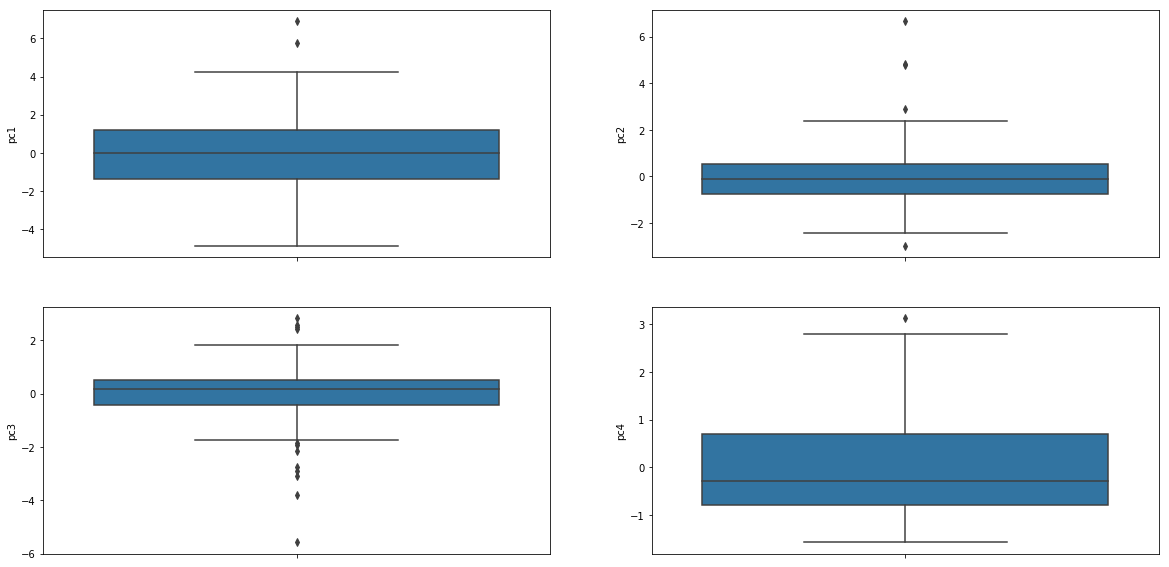

In [497]:
## first checking the outliers in all the 4 PC's

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(y = 'pc1', data = ic_pca_all)
plt.subplot(2,2,2)
sns.boxplot(y = 'pc2', data = ic_pca_all)
plt.subplot(2,2,3)
sns.boxplot(y = 'pc3', data = ic_pca_all)
plt.subplot(2,2,4)
sns.boxplot(y = 'pc4', data = ic_pca_all)

In [503]:
# removing ouliers in PC1 and we are storing outliers sepreately in each run

Q11 = ic_pca_all.pc1.quantile(0.25)
Q31 = ic_pca_all.pc1.quantile(0.75)
IQR1 = Q31 - Q11
outlier1 = ic_pca_all[(ic_pca_all.pc1 < (Q11 - 1.5 * IQR1)) | (ic_pca_all.pc1 > (Q31 + 1.5 * IQR1))]
ic_pca_all1 = ic_pca_all[(ic_pca_all.pc1 > (Q11 - 1.5 * IQR1)) & (ic_pca_all.pc1 < (Q31 + 1.5 * IQR1))]

In [505]:
# removing ouliers in PC2

Q12 = ic_pca_all1.pc2.quantile(0.25)
Q32 = ic_pca_all1.pc2.quantile(0.75)
IQR2 = Q32 - Q12
outlier2 = ic_pca_all1[(ic_pca_all1.pc2 < (Q12 - 1.5 * IQR2)) | (ic_pca_all1.pc2 > (Q32 + 1.5 * IQR2))]
ic_pca_all2 = ic_pca_all1[(ic_pca_all1.pc2 > (Q12 - 1.5 * IQR2)) & (ic_pca_all1.pc2 < (Q32 + 1.5 * IQR2))]

In [506]:
# removing ouliers in PC3

Q13 = ic_pca_all2.pc3.quantile(0.25)
Q33 = ic_pca_all2.pc3.quantile(0.75)
IQR3 = Q33 - Q13
outlier3 = ic_pca_all2[(ic_pca_all2.pc3 < (Q13 - 1.5 * IQR3)) | (ic_pca_all2.pc3 > (Q33 + 1.5 * IQR3))]
ic_pca_all3 = ic_pca_all2[(ic_pca_all2.pc3 > (Q13 - 1.5 * IQR3)) & (ic_pca_all2.pc3 < (Q33 + 1.5 * IQR3))]

In [507]:
# removing ouliers in PC4

Q14 = ic_pca_all3.pc4.quantile(0.25)
Q34 = ic_pca_all3.pc4.quantile(0.75)
IQR4 = Q34 - Q14
outlier4 = ic_pca_all3[(ic_pca_all3.pc4 < (Q14 - 1.5 * IQR4)) | (ic_pca_all3.pc4 > (Q34 + 1.5 * IQR4))]
ic_pca_all4 = ic_pca_all3[(ic_pca_all3.pc4 > (Q14 - 1.5 * IQR4)) & (ic_pca_all3.pc4 < (Q34 + 1.5 * IQR4))]

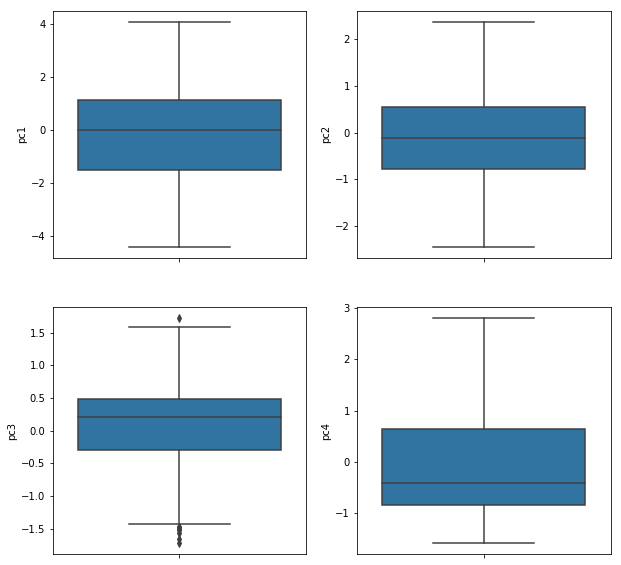

In [508]:
## checking again the outliers in all the 4 PC's

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(y = 'pc1', data = ic_pca_all4)
plt.subplot(2,2,2)
sns.boxplot(y = 'pc2', data = ic_pca_all4)
plt.subplot(2,2,3)
sns.boxplot(y = 'pc3', data = ic_pca_all4)
plt.subplot(2,2,4)
sns.boxplot(y = 'pc4', data = ic_pca_all4)

In [517]:
## still some outliers exist but retaining them as they are very near to IQR range

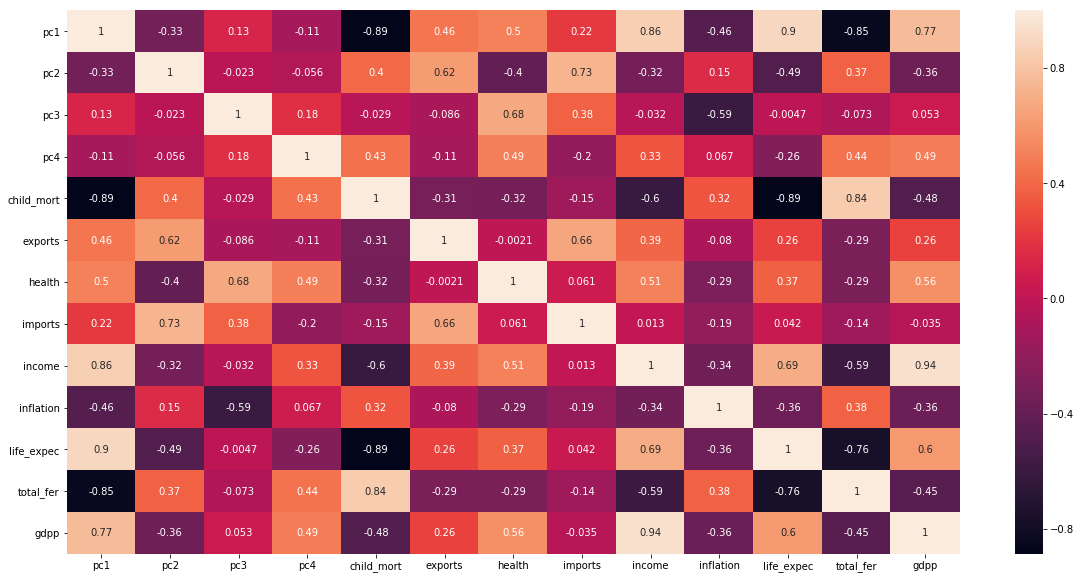

In [511]:
plt.figure(figsize = (20,10)) 
sns.heatmap(ic_pca_all4.corr(),annot = True)

In [612]:
## We see that all the original features are explained by various principle components
## Income,Life expectency and gdpp are explained by PC1
## Child_mort and Total_fertility is explained by PC1 but these are negatively correlated
## Exports and Imports are explained by PC2
## health is explained by PC3
## inflation is explained by PC3 but this negatively correlated
## pc4 also explains above variables but not so much as pc1 and pc2 are more explaining them better.

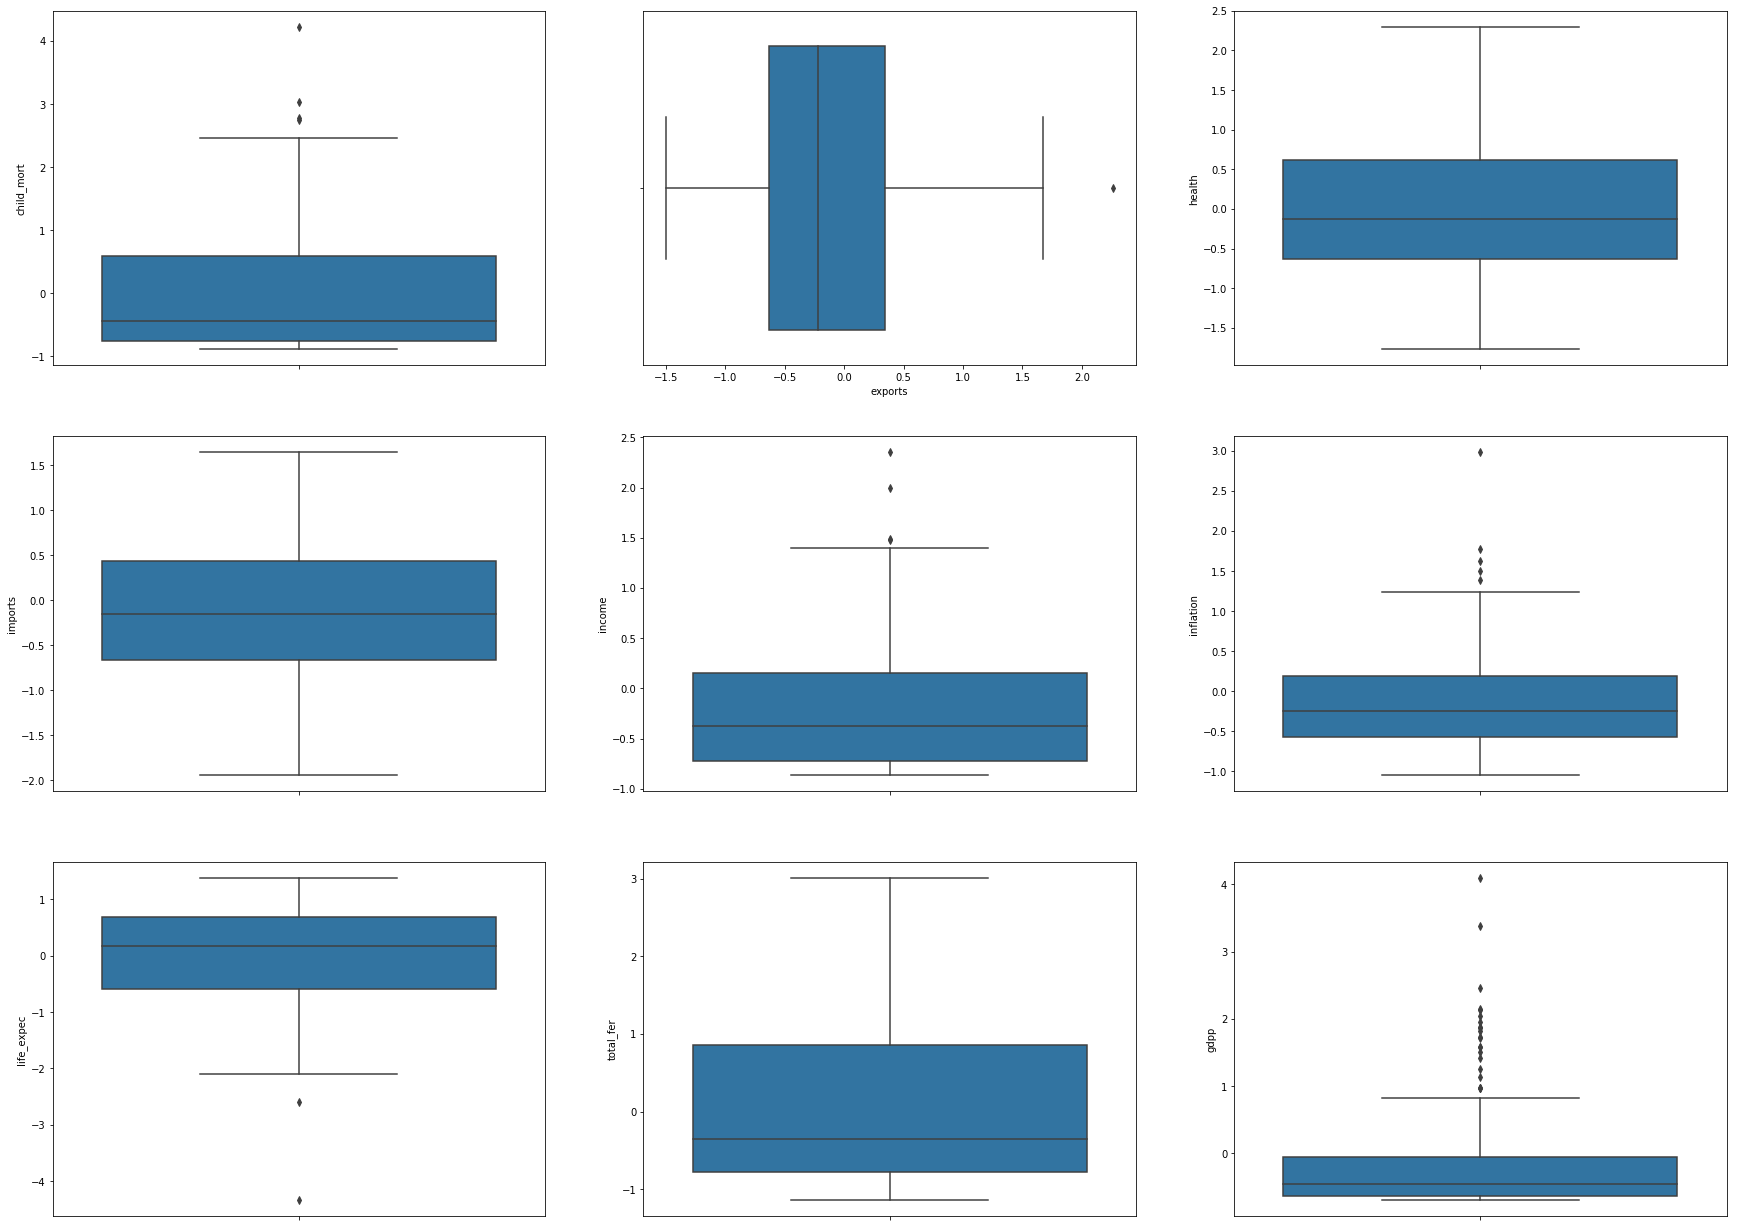

In [516]:
## checking outliers on original features after removing outliers in PC's

plt.figure(figsize=(30, 30))
plt.subplot(4,3,1)
sns.boxplot(y = 'child_mort', data = ic_pca_all4)
plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = ic_pca_all4)
plt.subplot(4,3,3)
sns.boxplot(y = 'health', data = ic_pca_all4)
plt.subplot(4,3,4)
sns.boxplot(y = 'imports', data = ic_pca_all4)
plt.subplot(4,3,5)
sns.boxplot(y = 'income', data = ic_pca_all4)
plt.subplot(4,3,6)
sns.boxplot(y = 'inflation', data = ic_pca_all4)
plt.subplot(4,3,7)
sns.boxplot(y = 'life_expec', data = ic_pca_all4)
plt.subplot(4,3,8)
sns.boxplot(y = 'total_fer', data = ic_pca_all4)
plt.subplot(4,3,9)
sns.boxplot(y = 'gdpp', data = ic_pca_all4)

In [515]:
ic_pca_all4.shape

(149, 14)

### scatter-plots on PC's post outlier analysis

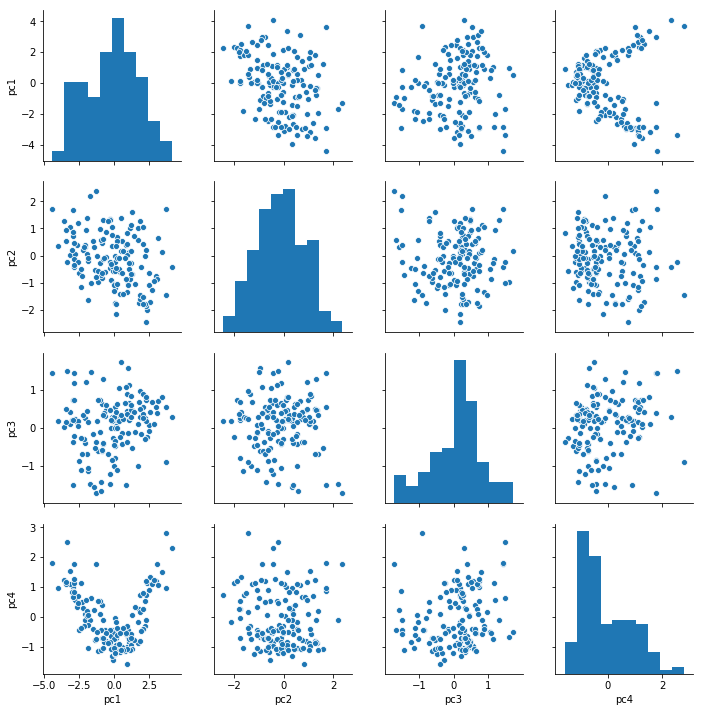

In [518]:
sns.pairplot(ic_pca_all4[['pc1','pc2','pc3','pc4']])

### checking if clustering can be done

### Hopkins Statistics:

In [519]:
## taking out only the 4 PC's we got from above PCA

ic_pca_kmeans=ic_pca_all4[['pc1','pc2','pc3','pc4']]
hopkins(ic_pca_kmeans)

0.7302699510668487

#### As the value is between 70 and 99 percent, we can confirm that data has high tendency to cluster

## Silhouette Analysis

In [520]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(ic_pca_kmeans)
    sse_.append([k, silhouette_score(ic_pca_kmeans, kmeans.labels_)])

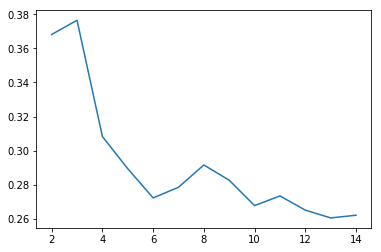

In [521]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [ ]:
# ABove plot showing that K=3 is good.

### Drawing the elbow curve also to take the value of K

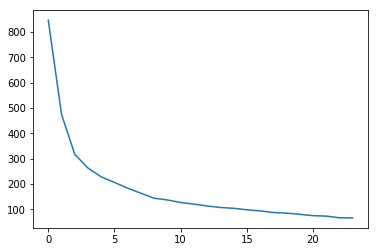

In [522]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,25)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(ic_pca_kmeans)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [523]:
## Firstly selecting the optimal clusters as 3 by elbow analysis and silhouette analysis

## K-Means with K=3

In [405]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [528]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50,random_state=42)
model_clus3.fit(ic_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [529]:
model_clus3.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2])

In [532]:
# analysis of clusters formed
# adding the cluster id to each row of dataset
# joining back the clustered data with last dataset we have
ic_pca_all4.index = pd.RangeIndex(len(ic_pca_all4.index))
km3 = pd.concat([ic_pca_all4, pd.Series(model_clus3.labels_)], axis=1)
km3.columns = ['Country','pc1','pc2','pc3','pc4','child_mort','exports','health','imports','income','inflation',
                'life_expec','total_fer','gdpp', 'ClusterID']
km3.columns

Index(['Country', 'pc1', 'pc2', 'pc3', 'pc4', 'child_mort', 'exports',
       'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
       'gdpp', 'ClusterID'],
      dtype='object')

In [543]:
km3.head()

,Country,pc1,pc2,pc3,pc4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,Albania,0.428070,-0.586096,0.320090,-1.167681,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [533]:
# performing mean analysis of all the columns

km3_cluster_pc1 = pd.DataFrame(km3.groupby(["ClusterID"]).pc1.mean())
km3_cluster_pc2 = pd.DataFrame(km3.groupby(["ClusterID"]).pc2.mean())
km3_cluster_pc3 = pd.DataFrame(km3.groupby(["ClusterID"]).pc3.mean())
km3_cluster_pc4 = pd.DataFrame(km3.groupby(["ClusterID"]).pc4.mean())
km3_cluster_child_mort = pd.DataFrame(km3.groupby(["ClusterID"]).child_mort.mean())
km3_cluster_exports = pd.DataFrame(km3.groupby(["ClusterID"]).exports.mean())
km3_cluster_health = pd.DataFrame(km3.groupby(["ClusterID"]).health.mean())
km3_cluster_imports =pd.DataFrame(km3.groupby(["ClusterID"]).imports.mean())
km3_cluster_income = pd.DataFrame(km3.groupby(["ClusterID"]).income.mean())
km3_cluster_inflation = pd.DataFrame(km3.groupby(["ClusterID"]).inflation.mean())
km3_cluster_life_expec = pd.DataFrame(km3.groupby(["ClusterID"]).life_expec.mean())
km3_cluster_total_fer = pd.DataFrame(km3.groupby(["ClusterID"]).total_fer.mean())
km3_cluster_gdpp = 	pd.DataFrame(km3.groupby(["ClusterID"]).gdpp.mean())


In [544]:
df_new = pd.concat([pd.Series([0,1,2]),km3_cluster_pc1,km3_cluster_pc2,km3_cluster_pc3,km3_cluster_pc4,km3_cluster_child_mort,
                    km3_cluster_exports,km3_cluster_health,km3_cluster_imports,km3_cluster_income,km3_cluster_inflation,
                    km3_cluster_life_expec,km3_cluster_total_fer,km3_cluster_gdpp], axis=1)


df_new.columns = ["ClusterID", "pc1_mean","pc2_mean","pc3_mean","pc4_mean","child_mort_mean","exports_mean",
                  "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_new.head()

,ClusterID,pc1_mean,pc2_mean,pc3_mean,pc4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,2.445401,-0.830759,0.326261,0.772250,-0.839351,0.149691,1.042512,-0.145044,1.051808,-0.628832,1.097794,-0.799870,1.512521
1,1,0.166819,-0.146430,0.023138,-0.795092,-0.401267,-0.033874,-0.216158,0.015897,-0.283432,-0.075135,0.253701,-0.441459,-0.380406
2,2,-2.428783,0.364019,0.061477,0.641638,1.354519,-0.420936,-0.272458,-0.306371,-0.679865,0.254131,-1.260544,1.396259,-0.601223


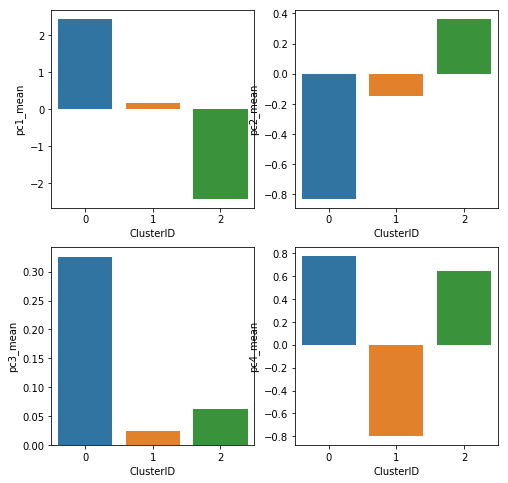

In [613]:
## analysing the means of principle components clusterwise

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.barplot(x=df_new.ClusterID, y=df_new.pc1_mean)

plt.subplot(2,2,2)
sns.barplot(x=df_new.ClusterID, y=df_new.pc2_mean)

plt.subplot(2,2,3)
sns.barplot(x=df_new.ClusterID, y=df_new.pc3_mean)

plt.subplot(2,2,4)
sns.barplot(x=df_new.ClusterID, y=df_new.pc4_mean)


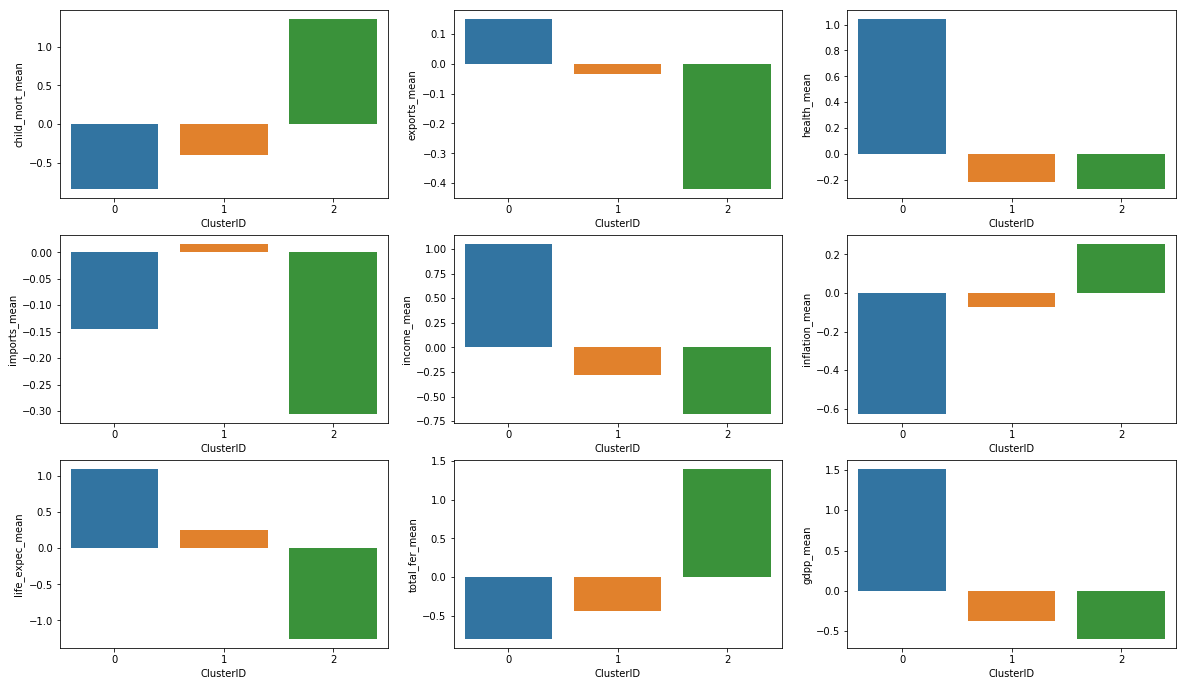

In [546]:
## analysing means of original features too by clusterwise

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.barplot(x=df_new.ClusterID,y=df_new.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=df_new.ClusterID,y=df_new.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=df_new.ClusterID,y=df_new.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=df_new.ClusterID,y=df_new.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=df_new.ClusterID,y=df_new.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=df_new.ClusterID,y=df_new.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=df_new.ClusterID,y=df_new.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=df_new.ClusterID,y=df_new.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=df_new.ClusterID,y=df_new.gdpp_mean)

In [ ]:
## After analyzing the visualizations of PC's and original variables we can conclude that
## PC1's mean is very low for clusterid 2 which implies that Clusterid 2 has low income,low gdpp, high child_mort and high fert_rate
##PC3's mean is little high for clusterid 2 compared to clusterid1 which implies that cluster2 is having high inflation and low health
## and low imports and exports of clusterid2 
## So clusterid 2 here needs more aid from the foundation

In [575]:
km3[km3.ClusterID == 2].Country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
35                      Comoros
36             Congo, Dem. Rep.
37                  Congo, Rep.
39                Cote d'Ivoire
48            Equatorial Guinea
49                      Eritrea
54                        Gabon
55                       Gambia
58                        Ghana
62                       Guinea
63                Guinea-Bissau
65                        Haiti
71                         Iraq
79                        Kenya
81                          Lao
87                   Madagascar
88                       Malawi
91                         Mali
92                   Mauritania
98                   Mozambique
100                     Namibia
104                       Niger
106     

In [ ]:
### Trying with no.of clusters = 4

In [552]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state=42)
model_clus4.fit(ic_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [553]:
model_clus4.labels_

array([1, 3, 3, 1, 2, 3, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 2, 1, 2, 3, 2, 1,
       3, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 3, 3, 1, 1, 1, 2, 1, 2, 2, 2, 0,
       3, 3, 3, 3, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 3, 3, 1, 1, 2, 1,
       2, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 0, 0, 1, 0, 1, 2, 2, 3,
       3, 2, 0, 3, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 0, 3, 1, 3, 0, 0, 3,
       1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 3, 3, 3, 2, 1, 1])

In [554]:
# analysis of clusters formed
# adding the cluster id to each row of dataset
# joining back the clustered data with last dataset we have
ic_pca_all4.index = pd.RangeIndex(len(ic_pca_all4.index))
km4 = pd.concat([ic_pca_all4, pd.Series(model_clus4.labels_)], axis=1)
km4.columns = ['Country','pc1','pc2','pc3','pc4','child_mort','exports','health','imports','income','inflation',
                'life_expec','total_fer','gdpp', 'ClusterID']
km4.columns

Index(['Country', 'pc1', 'pc2', 'pc3', 'pc4', 'child_mort', 'exports',
       'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
       'gdpp', 'ClusterID'],
      dtype='object')

In [557]:
# performing mean analysis of all the columns

km4_cluster_pc1 = pd.DataFrame(km4.groupby(["ClusterID"]).pc1.mean())
km4_cluster_pc2 = pd.DataFrame(km4.groupby(["ClusterID"]).pc2.mean())
km4_cluster_pc3 = pd.DataFrame(km4.groupby(["ClusterID"]).pc3.mean())
km4_cluster_pc4 = pd.DataFrame(km4.groupby(["ClusterID"]).pc4.mean())
km4_cluster_child_mort = pd.DataFrame(km4.groupby(["ClusterID"]).child_mort.mean())
km4_cluster_exports = pd.DataFrame(km4.groupby(["ClusterID"]).exports.mean())
km4_cluster_health = pd.DataFrame(km4.groupby(["ClusterID"]).health.mean())
km4_cluster_imports =pd.DataFrame(km4.groupby(["ClusterID"]).imports.mean())
km4_cluster_income = pd.DataFrame(km4.groupby(["ClusterID"]).income.mean())
km4_cluster_inflation = pd.DataFrame(km4.groupby(["ClusterID"]).inflation.mean())
km4_cluster_life_expec = pd.DataFrame(km4.groupby(["ClusterID"]).life_expec.mean())
km4_cluster_total_fer = pd.DataFrame(km4.groupby(["ClusterID"]).total_fer.mean())
km4_cluster_gdpp = 	pd.DataFrame(km4.groupby(["ClusterID"]).gdpp.mean())


In [558]:
df_new1 = pd.concat([pd.Series([0,1,2,3]),km4_cluster_pc1,km4_cluster_pc2,km4_cluster_pc3,km4_cluster_pc4,km4_cluster_child_mort,
                    km4_cluster_exports,km4_cluster_health,km4_cluster_imports,km4_cluster_income,km4_cluster_inflation,
                    km4_cluster_life_expec,km4_cluster_total_fer,km4_cluster_gdpp], axis=1)


df_new1.columns = ["ClusterID", "pc1_mean","pc2_mean","pc3_mean","pc4_mean","child_mort_mean","exports_mean",
                  "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_new1.head()

,ClusterID,pc1_mean,pc2_mean,pc3_mean,pc4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,2.581300,-1.082748,0.313695,1.055989,-0.848363,0.033268,1.227648,-0.315782,1.181322,-0.611224,1.176926,-0.756976,1.768530
1,1,-2.462302,0.379137,0.065845,0.644031,1.387581,-0.429469,-0.292806,-0.301048,-0.690546,0.240259,-1.281546,1.404073,-0.604510
2,2,0.820244,0.347984,0.359504,-0.752414,-0.562162,0.445827,0.050667,0.550414,-0.098543,-0.338624,0.392724,-0.625281,-0.209470
3,3,-0.330936,-0.669813,-0.306522,-0.730656,-0.271838,-0.482687,-0.409402,-0.529315,-0.361074,0.151349,0.164587,-0.274274,-0.431644


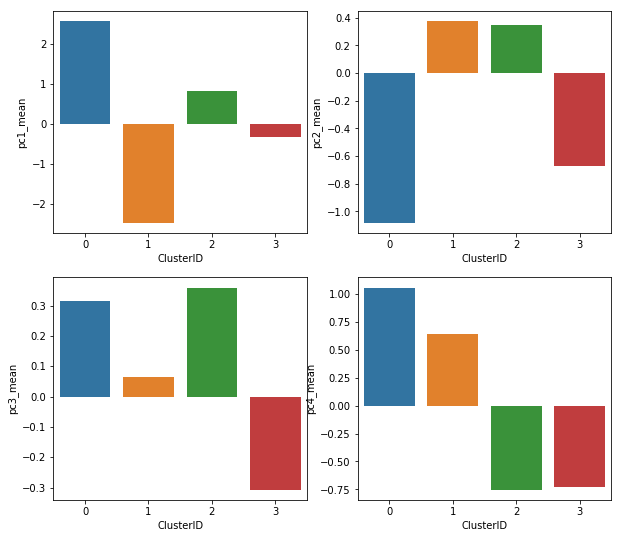

In [616]:
## analysing the means of principle components clusterwise

plt.figure(figsize=(10, 9))
plt.subplot(2,2,1)
sns.barplot(x=df_new1.ClusterID, y=df_new1.pc1_mean)

plt.subplot(2,2,2)
sns.barplot(x=df_new1.ClusterID, y=df_new1.pc2_mean)

plt.subplot(2,2,3)
sns.barplot(x=df_new1.ClusterID, y=df_new1.pc3_mean)

plt.subplot(2,2,4)
sns.barplot(x=df_new1.ClusterID, y=df_new1.pc4_mean)

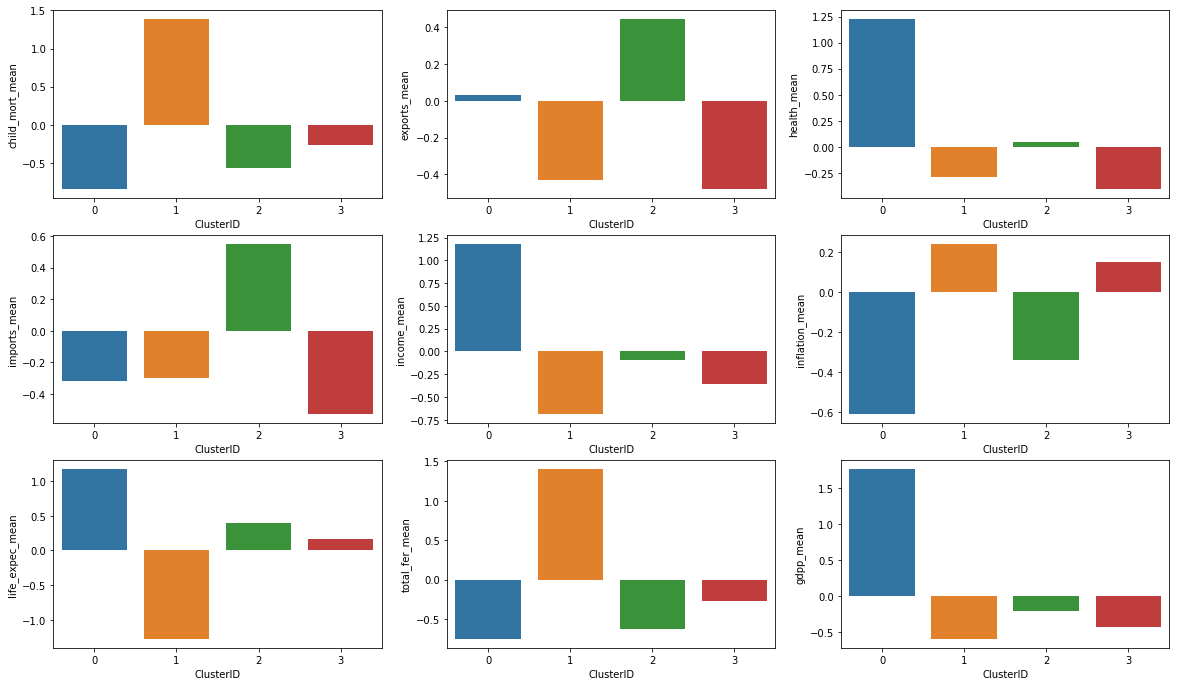

In [561]:
## analysing means of original features too by clusterwise

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.barplot(x=df_new1.ClusterID,y=df_new1.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=df_new1.ClusterID,y=df_new1.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=df_new1.ClusterID,y=df_new1.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=df_new1.ClusterID,y=df_new1.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=df_new1.ClusterID,y=df_new1.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=df_new1.ClusterID,y=df_new1.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=df_new1.ClusterID,y=df_new1.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=df_new1.ClusterID,y=df_new1.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=df_new1.ClusterID,y=df_new1.gdpp_mean)

In [562]:
## PC1's mean is very low for cluster id '1' which implies that Clusterid 1 has low income,low gdpp, high child_mort and 
## high fert_rate and low life_expec and it has high inflation compared to clusterid 3 and clusterid 2, so we can say that cluster1 is looking for 
## more aid

In [574]:
km4[km4.ClusterID == 1].Country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
35                      Comoros
36             Congo, Dem. Rep.
37                  Congo, Rep.
39                Cote d'Ivoire
48            Equatorial Guinea
49                      Eritrea
54                        Gabon
55                       Gambia
58                        Ghana
62                       Guinea
63                Guinea-Bissau
65                        Haiti
79                        Kenya
81                          Lao
87                   Madagascar
88                       Malawi
91                         Mali
92                   Mauritania
98                   Mozambique
100                     Namibia
104                       Niger
106                    Pakistan
115     

In [ ]:
# trying with K=5

In [564]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state=42)
model_clus5.fit(ic_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [565]:
model_clus5.labels_

array([3, 2, 2, 3, 1, 2, 2, 4, 4, 2, 1, 1, 2, 1, 1, 4, 1, 3, 1, 2, 1, 0,
       2, 1, 3, 3, 0, 3, 4, 1, 3, 3, 2, 2, 2, 0, 3, 0, 1, 3, 1, 1, 1, 4,
       2, 2, 2, 2, 0, 0, 1, 1, 4, 4, 0, 0, 1, 4, 0, 4, 2, 2, 3, 3, 1, 3,
       1, 4, 2, 2, 2, 0, 4, 4, 4, 2, 4, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       3, 1, 1, 3, 0, 1, 1, 0, 1, 2, 3, 2, 0, 2, 4, 4, 3, 4, 0, 1, 1, 2,
       2, 1, 4, 2, 2, 0, 2, 0, 1, 3, 1, 1, 0, 0, 1, 4, 2, 0, 2, 4, 4, 0,
       3, 1, 3, 3, 2, 1, 2, 0, 3, 1, 4, 2, 2, 0, 1, 0, 3])

In [566]:
# analysis of clusters formed
# adding the cluster id to each row of dataset
# joining back the clustered data with last dataset we have
ic_pca_all4.index = pd.RangeIndex(len(ic_pca_all4.index))
km5 = pd.concat([ic_pca_all4, pd.Series(model_clus5.labels_)], axis=1)
km5.columns = ['Country','pc1','pc2','pc3','pc4','child_mort','exports','health','imports','income','inflation',
                'life_expec','total_fer','gdpp', 'ClusterID']
km5.columns

Index(['Country', 'pc1', 'pc2', 'pc3', 'pc4', 'child_mort', 'exports',
       'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',
       'gdpp', 'ClusterID'],
      dtype='object')

In [567]:
# performing mean analysis of all the columns

km5_cluster_pc1 = pd.DataFrame(km5.groupby(["ClusterID"]).pc1.mean())
km5_cluster_pc2 = pd.DataFrame(km5.groupby(["ClusterID"]).pc2.mean())
km5_cluster_pc3 = pd.DataFrame(km5.groupby(["ClusterID"]).pc3.mean())
km5_cluster_pc4 = pd.DataFrame(km5.groupby(["ClusterID"]).pc4.mean())
km5_cluster_child_mort = pd.DataFrame(km5.groupby(["ClusterID"]).child_mort.mean())
km5_cluster_exports = pd.DataFrame(km5.groupby(["ClusterID"]).exports.mean())
km5_cluster_health = pd.DataFrame(km5.groupby(["ClusterID"]).health.mean())
km5_cluster_imports =pd.DataFrame(km5.groupby(["ClusterID"]).imports.mean())
km5_cluster_income = pd.DataFrame(km5.groupby(["ClusterID"]).income.mean())
km5_cluster_inflation = pd.DataFrame(km5.groupby(["ClusterID"]).inflation.mean())
km5_cluster_life_expec = pd.DataFrame(km5.groupby(["ClusterID"]).life_expec.mean())
km5_cluster_total_fer = pd.DataFrame(km5.groupby(["ClusterID"]).total_fer.mean())
km5_cluster_gdpp = 	pd.DataFrame(km5.groupby(["ClusterID"]).gdpp.mean())

In [569]:
df_new2 = pd.concat([pd.Series([0,1,2,3,4]),km5_cluster_pc1,km5_cluster_pc2,km5_cluster_pc3,km5_cluster_pc4,km5_cluster_child_mort,
                    km5_cluster_exports,km5_cluster_health,km5_cluster_imports,km5_cluster_income,km5_cluster_inflation,
                    km5_cluster_life_expec,km5_cluster_total_fer,km5_cluster_gdpp], axis=1)


df_new2.columns = ["ClusterID", "pc1_mean","pc2_mean","pc3_mean","pc4_mean","child_mort_mean","exports_mean",
                  "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_new2.head()

,ClusterID,pc1_mean,pc2_mean,pc3_mean,pc4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-1.531482,0.393230,-0.213821,-0.000481,0.611702,-0.121653,-0.499945,-0.108269,-0.567554,0.349516,-0.780586,0.770423,-0.547334
1,1,0.922907,0.290423,0.359905,-0.763578,-0.613975,0.428560,0.086602,0.545804,-0.059507,-0.337723,0.463653,-0.687393,-0.182248
2,2,-0.256291,-0.769591,-0.305439,-0.781692,-0.296184,-0.519207,-0.432751,-0.604860,-0.338891,0.063284,0.233699,-0.349253,-0.417283
3,3,-3.020010,0.438003,0.353107,1.051658,1.854475,-0.583829,-0.063200,-0.320949,-0.801068,0.161977,-1.615659,1.794569,-0.659741
4,4,2.581300,-1.082748,0.313695,1.055989,-0.848363,0.033268,1.227648,-0.315782,1.181322,-0.611224,1.176926,-0.756976,1.768530


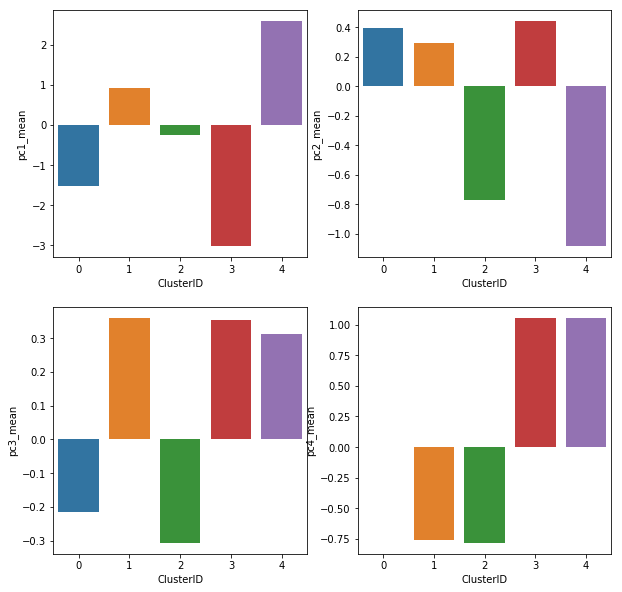

In [570]:
## analysing the means of principle components clusterwise

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.barplot(x=df_new2.ClusterID, y=df_new2.pc1_mean)

plt.subplot(2,2,2)
sns.barplot(x=df_new2.ClusterID, y=df_new2.pc2_mean)

plt.subplot(2,2,3)
sns.barplot(x=df_new2.ClusterID, y=df_new2.pc3_mean)

plt.subplot(2,2,4)
sns.barplot(x=df_new2.ClusterID, y=df_new2.pc4_mean)

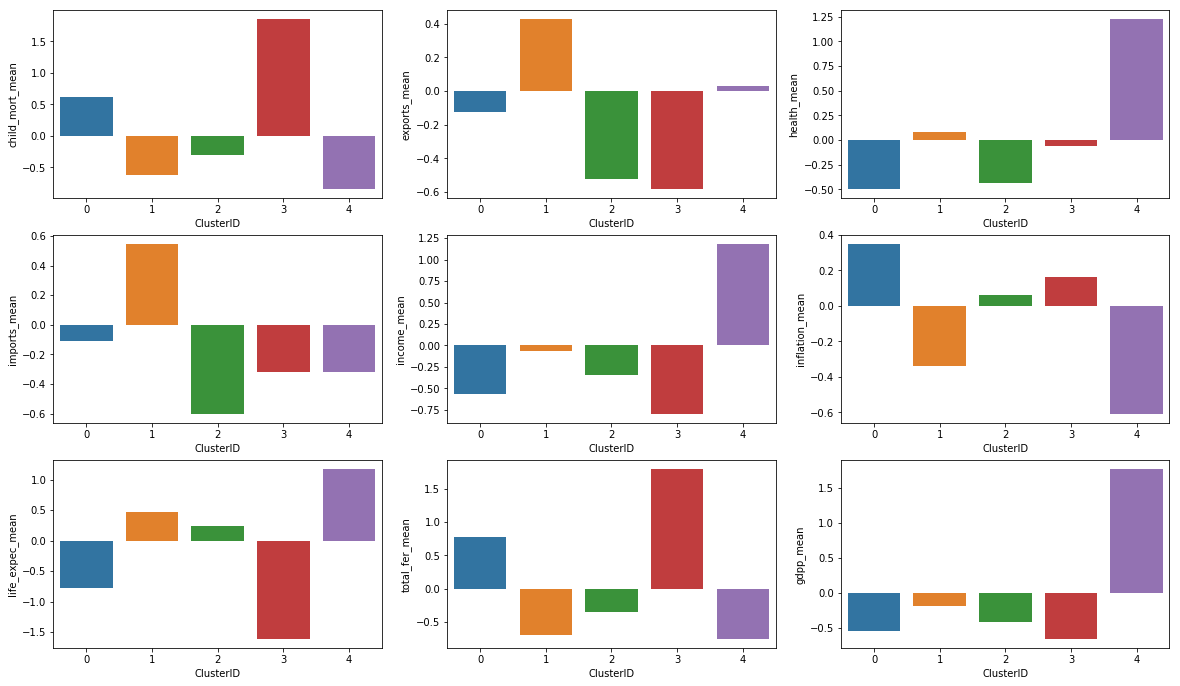

In [571]:
## analysing means of original features too by clusterwise

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.barplot(x=df_new2.ClusterID,y=df_new2.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=df_new2.ClusterID,y=df_new2.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=df_new2.ClusterID,y=df_new2.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=df_new2.ClusterID,y=df_new2.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=df_new2.ClusterID,y=df_new2.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=df_new2.ClusterID,y=df_new2.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=df_new2.ClusterID,y=df_new2.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=df_new2.ClusterID,y=df_new2.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=df_new2.ClusterID,y=df_new2.gdpp_mean)

In [ ]:
## PC1's mean is very low for cluster id '3' which implies that Clusterid 3 has low income,low gdpp, high child_mort and 
## high fert_rate and it has low life_expec compared to clusterid 3 and clusterid 2,compared with pc3's mean and pc2's mean
##so we can say that cluster3 is looking for  more aid

In [576]:
km5[km5.ClusterID == 3]

,Country,pc1,pc2,pc3,pc4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,3
3,Angola,-2.922180,1.694341,-1.517172,0.873340,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,3
17,Benin,-2.671162,0.390062,0.138931,0.320869,1.808842,-0.633337,-0.991634,-0.401467,-0.797319,-0.654410,-0.987502,1.598107,-0.667961,3
24,Burkina Faso,-3.115829,0.023245,0.409468,1.093647,1.933196,-0.801651,-0.027638,-0.716337,-0.817611,-0.092213,-1.427359,1.936010,-0.677976,3
25,Burundi,-2.886928,-0.418464,1.430150,1.767826,1.376093,-1.177797,1.746991,-0.318607,-0.852261,0.428709,-1.449916,2.194407,-0.696801,3
27,Cameroon,-2.805745,0.054445,0.238061,0.579209,1.734230,-0.691881,-0.615529,-0.824055,-0.753616,-0.557152,-1.495030,1.432468,-0.637754,3
30,Central African Republic,-3.962472,0.356512,0.185934,0.970087,2.753928,-1.072418,-1.035452,-0.844770,-0.845810,-0.547664,-2.600313,1.498724,-0.685035,3
31,Chad,-3.552165,1.263414,0.025033,1.243340,2.778798,-0.157666,-0.834619,-0.140457,-0.791596,-0.132065,-1.585257,2.413050,-0.660355,3
36,"Congo, Dem. Rep.",-3.159528,1.057348,0.088721,1.547888,1.933196,-0.000328,0.399588,0.112267,-0.860326,1.235237,-1.472473,2.379922,-0.691164,3
39,Cote d'Ivoire,-2.577801,1.188306,0.175599,0.686870,1.808842,0.347277,-0.553454,-0.148743,-0.752055,-0.226950,-1.607814,1.538477,-0.642679,3


In [ ]:
## so for different k-values, we observe that different clusters are more looking for financial aid like for k=3 cluster 2 , 
## k=4 cluster1, for k=5 cluster3 is more looking for finanical aid than other clusters. this depends on different values for K

## Heirarchical Clustering

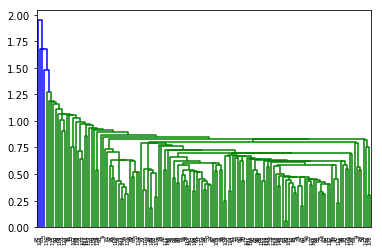

In [579]:
# heirarchical clustering
mergings = linkage(ic_pca_kmeans, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [582]:
## Let's assign cluster Id's to each row and calculate means by clusterwise

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
cluster_hc = pd.concat([ic_pca_all4, clusterCut], axis=1)
cluster_hc.columns = ['Country', 'pc1', 'pc2', 'pc3','pc4','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [584]:
cluster_hc_pc1 = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).pc1.mean())
cluster_hc_pc2 =pd.DataFrame(cluster_hc.groupby(["ClusterID"]).pc2.mean())
cluster_hc_pc3 =pd.DataFrame(cluster_hc.groupby(["ClusterID"]).pc3.mean())
cluster_hc_pc4 =pd.DataFrame(cluster_hc.groupby(["ClusterID"]).pc4.mean())
cluster_hc_child_mort =pd.DataFrame(cluster_hc.groupby(["ClusterID"]).child_mort.mean())
cluster_hc_exports = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).exports.mean())
cluster_hc_health = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).health.mean())
cluster_hc_imports =pd.DataFrame(cluster_hc.groupby(["ClusterID"]).imports.mean())
cluster_hc_income = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).income.mean())
cluster_hc_inflation =pd.DataFrame(cluster_hc.groupby(["ClusterID"]).inflation.mean())
cluster_hc_life_expec = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).life_expec.mean())
cluster_hc_total_fer = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).total_fer.mean())
cluster_hc_gdpp = pd.DataFrame(cluster_hc.groupby(["ClusterID"]).gdpp.mean())

In [585]:
df_hc = pd.concat([pd.Series([0,1,2,3]), cluster_hc_pc1,cluster_hc_pc2,cluster_hc_pc3,cluster_hc_pc4,cluster_hc_child_mort,cluster_hc_exports,cluster_hc_health,cluster_hc_imports,cluster_hc_income,cluster_hc_inflation,cluster_hc_life_expec,cluster_hc_total_fer,cluster_hc_gdpp], axis=1)
df_hc.columns = ["ClusterID", "pc1_mean","pc2_mean","pc3_mean","pc4_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc.head()

,ClusterID,pc1_mean,pc2_mean,pc3_mean,pc4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-0.143639,-0.148492,0.101166,-0.131179,-0.011742,-0.117743,0.003150,-0.112799,-0.166356,-0.094311,0.003916,0.014509,-0.115219
1,1,-1.286122,2.370450,-1.716549,1.759636,1.808842,1.635248,-0.852877,0.497568,0.861347,1.624268,-1.089007,1.498724,0.226327
2,2,-4.405521,1.725333,1.424338,1.793049,4.221297,-0.944352,0.034438,0.737863,-0.813969,-0.221257,-4.337186,0.253120,-0.673215
3,3,3.708452,-1.445894,-0.894415,2.795629,-0.872216,-0.051555,0.972873,-0.761910,2.349360,-0.173815,1.177951,-0.661206,4.095266


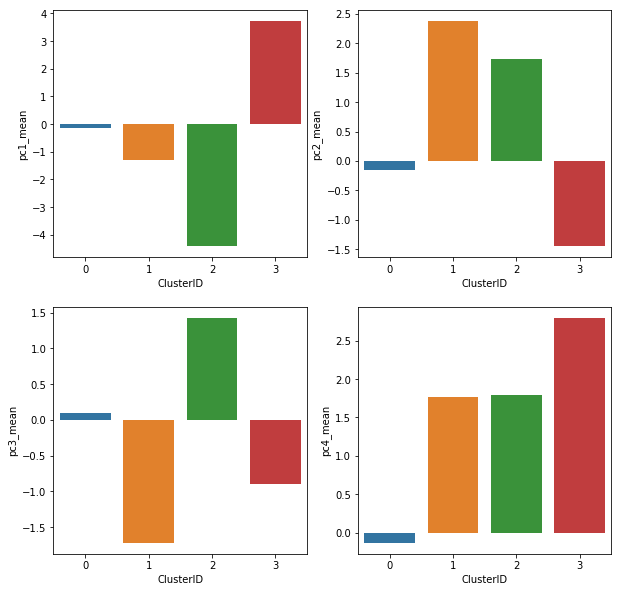

In [587]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.barplot(x=df_hc.ClusterID, y=df_hc.pc1_mean)

plt.subplot(2,2,2)
sns.barplot(x=df_hc.ClusterID, y=df_hc.pc2_mean)

plt.subplot(2,2,3)
sns.barplot(x=df_hc.ClusterID, y=df_hc.pc3_mean)

plt.subplot(2,2,4)
sns.barplot(x=df_hc.ClusterID, y=df_hc.pc4_mean)


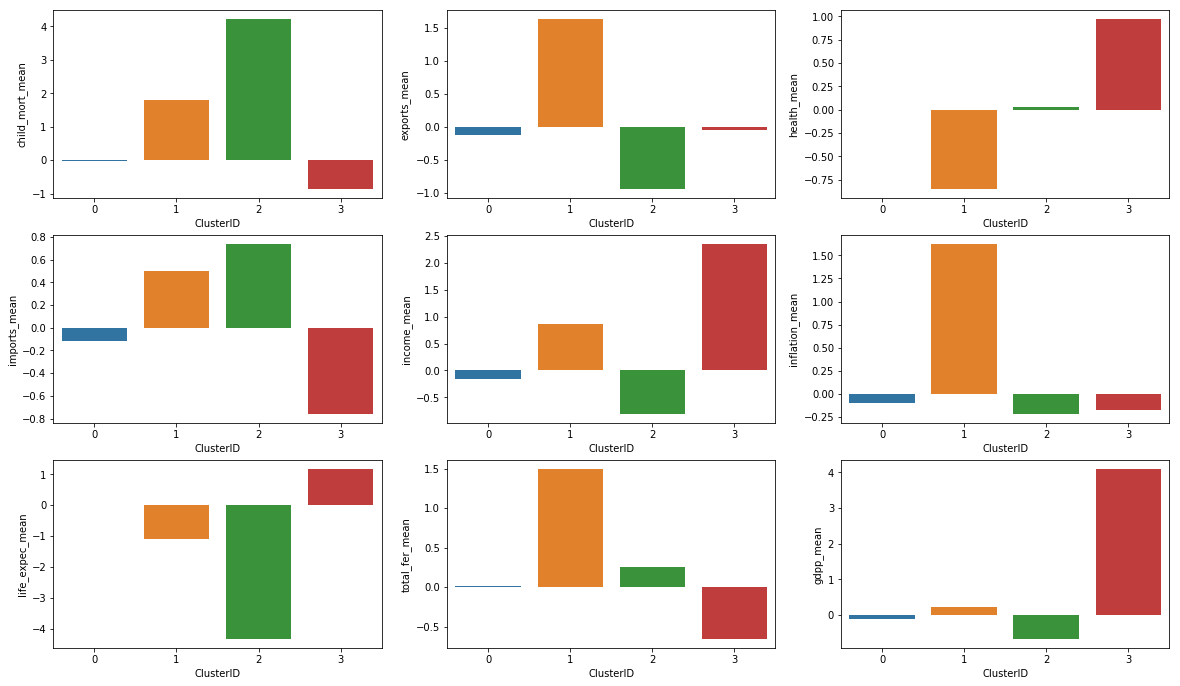

In [589]:
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.barplot(x=df_hc.ClusterID,y=df_hc.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=df_hc.ClusterID,y=df_hc.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=df_hc.ClusterID,y=df_hc.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=df_hc.ClusterID,y=df_hc.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=df_hc.ClusterID,y=df_hc.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=df_hc.ClusterID,y=df_hc.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=df_hc.ClusterID,y=df_hc.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=df_hc.ClusterID,y=df_hc.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=df_hc.ClusterID,y=df_hc.gdpp_mean)

In [595]:
## from above we have to cehck for cluster id2 from pc1 mean which is very low for cluster id 2
# we can say that cluster 2 is more looking for aid

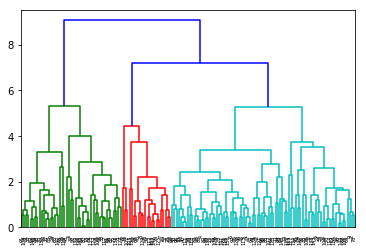

In [596]:
# heirarchical clustering
mergings1 = linkage(ic_pca_kmeans, method = "complete", metric='euclidean')
dendrogram(mergings1)
plt.show()

In [597]:
clusterCut = pd.Series(cut_tree(mergings1, n_clusters = 4).reshape(-1,))
cluster_hc1 = pd.concat([ic_pca_all4, clusterCut], axis=1)
cluster_hc1.columns = ['Country', 'pc1', 'pc2', 'pc3','pc4','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [598]:
cluster_hc1_pc1 = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).pc1.mean())
cluster_hc1_pc2 =pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).pc2.mean())
cluster_hc1_pc3 =pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).pc3.mean())
cluster_hc1_pc4 =pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).pc4.mean())
cluster_hc1_child_mort =pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).child_mort.mean())
cluster_hc1_exports = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).exports.mean())
cluster_hc1_health = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).health.mean())
cluster_hc1_imports =pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).imports.mean())
cluster_hc1_income = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).income.mean())
cluster_hc1_inflation =pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).inflation.mean())
cluster_hc1_life_expec = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).life_expec.mean())
cluster_hc1_total_fer = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).total_fer.mean())
cluster_hc1_gdpp = pd.DataFrame(cluster_hc1.groupby(["ClusterID"]).gdpp.mean())

In [599]:
df_hc1 = pd.concat([pd.Series([0,1,2,3]), cluster_hc1_pc1,cluster_hc1_pc2,cluster_hc1_pc3,cluster_hc1_pc4,cluster_hc1_child_mort,cluster_hc1_exports,cluster_hc1_health,cluster_hc1_imports,cluster_hc1_income,cluster_hc1_inflation,cluster_hc1_life_expec,cluster_hc1_total_fer,cluster_hc1_gdpp], axis=1)
df_hc1.columns = ["ClusterID", "pc1_mean","pc2_mean","pc3_mean","pc4_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc1.head()

,ClusterID,pc1_mean,pc2_mean,pc3_mean,pc4_mean,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,-3.109356,0.429572,0.435962,1.082296,1.937299,-0.637325,-0.057580,-0.342844,-0.810735,0.059438,-1.735260,1.784947,-0.673130
1,1,0.184744,-0.283343,-0.037027,-0.672923,-0.381050,-0.089270,-0.163278,-0.114960,-0.211695,-0.036966,0.301537,-0.401355,-0.304394
2,2,-1.308202,0.777330,0.039969,-0.100072,0.584310,0.111344,-0.474143,0.289422,-0.572265,0.109969,-0.783588,0.682986,-0.546338
3,3,2.581300,-1.082748,0.313695,1.055989,-0.848363,0.033268,1.227648,-0.315782,1.181322,-0.611224,1.176926,-0.756976,1.768530


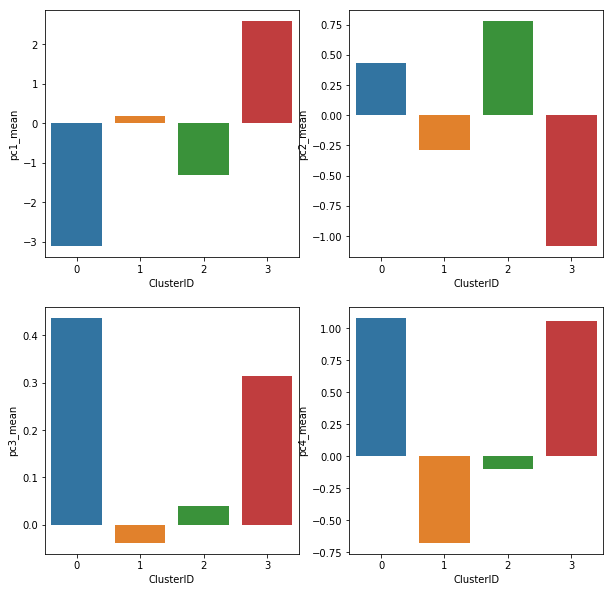

In [617]:

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1.pc1_mean)

plt.subplot(2,2,2)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1.pc2_mean)

plt.subplot(2,2,3)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1.pc3_mean)

plt.subplot(2,2,4)
sns.barplot(x=df_hc1.ClusterID, y=df_hc1.pc4_mean)

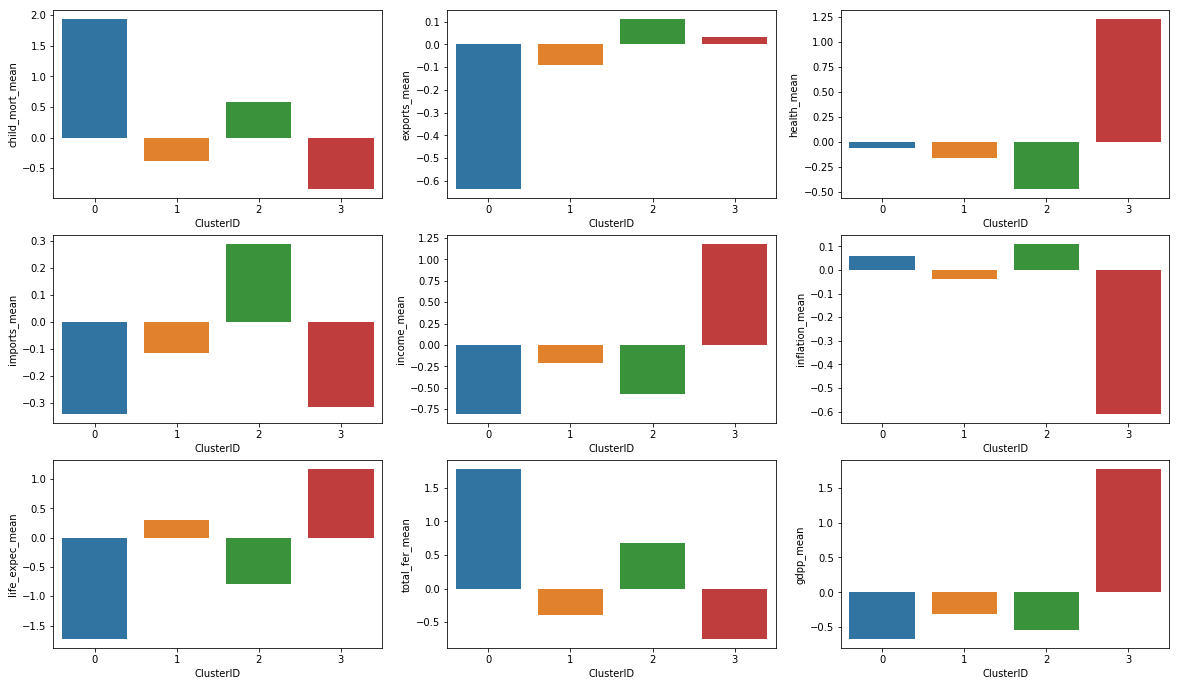

In [606]:
plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=df_hc1.ClusterID,y=df_hc1.gdpp_mean)

In [618]:
# from above graaphs we can check for cluster id 0 which has pc1 mean is v ery low which means low gdpp and income, high child_mort
# high life_expec, high total_fer
cluster_hc1[cluster_hc1.ClusterID == 0].Country

0                   Afghanistan
17                        Benin
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
36             Congo, Dem. Rep.
39                Cote d'Ivoire
62                       Guinea
63                Guinea-Bissau
65                        Haiti
88                       Malawi
91                         Mali
98                   Mozambique
104                       Niger
119                Sierra Leone
132                    Tanzania
140                      Uganda
148                      Zambia
Name: Country, dtype: object

In [619]:
# from above graaphs apart from cluster id 0 we can check for cluster id 2 which has pc1 mean is v ery low which means 
# low gdpp and income, high child_mort high life_expec, high total_fer
cluster_hc1[cluster_hc1.ClusterID == 2].Country

3                 Angola
18                Bhutan
21              Botswana
26              Cambodia
35               Comoros
37           Congo, Rep.
48     Equatorial Guinea
51                  Fiji
55                Gambia
58                 Ghana
64                Guyana
71                  Iraq
79                 Kenya
80       Kyrgyz Republic
81                   Lao
87            Madagascar
92            Mauritania
100              Namibia
117              Senegal
122      Solomon Islands
123         South Africa
131           Tajikistan
135                 Togo
139         Turkmenistan
145              Vanuatu
Name: Country, dtype: object

In [610]:
## apart from cluster id 0, cluster id2 also looking for financial aid

In [611]:
# from hierarchial clustering says that cluster 0 and cluster 2 are more looking for financial aid